In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import requests
import json
from api_key import api_key
from itertools import islice
from time import sleep

In [31]:
%matplotlib notebook

In [2]:
prices_ds = "../Project-1---Corn-v.-Weather/Corn_price_2016to2018-bu.csv"
original_corn_price_df = pd.read_csv(prices_ds)
original_corn_price_df.head()

,Program,DATE,Period,Week Ending,Geo Level,STATE,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Domain,PRICE RECEIVED -- $ / BU,CV (%)
0,SURVEY,2018,MARKETING YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,4.11,NaN
1,SURVEY,2018,MARKETING YEAR,NaN,STATE,ALASKA,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,NaN,NaN
2,SURVEY,2018,MARKETING YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,4.96,NaN
3,SURVEY,2018,MARKETING YEAR,NaN,STATE,ARKANSAS,5,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,3.80,NaN
4,SURVEY,2018,MARKETING YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,4.40,NaN


In [3]:
clean_price_values = {'PRICE RECEIVED -- $ / BU':0}
corn_price_clean_df = original_corn_price_df.fillna(value=clean_price_values)
corn_price_clean_df.head()

,Program,DATE,Period,Week Ending,Geo Level,STATE,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Domain,PRICE RECEIVED -- $ / BU,CV (%)
0,SURVEY,2018,MARKETING YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,4.11,NaN
1,SURVEY,2018,MARKETING YEAR,NaN,STATE,ALASKA,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,0.00,NaN
2,SURVEY,2018,MARKETING YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,4.96,NaN
3,SURVEY,2018,MARKETING YEAR,NaN,STATE,ARKANSAS,5,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,3.80,NaN
4,SURVEY,2018,MARKETING YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CORN,TOTAL,4.40,NaN


In [4]:
corn_price_clean_df.rename(columns={'DATE':'Date','STATE':'State','PRICE RECEIVED -- $ / BU':'Price'}, inplace=True)

In [5]:
corn_price_clean_df.count()

Program             182
Date                182
Period              182
Week Ending           0
Geo Level           182
State               182
State ANSI          182
Ag District           0
Ag District Code      0
County                0
County ANSI           0
Zip Code              0
Region                0
watershed_code      182
Watershed             0
Commodity           182
Domain              182
Price               182
CV (%)                0
dtype: int64

In [6]:
corn_price_clean_df_01=corn_price_clean_df.dropna(axis=1)
corn_price_clean_df_01

,Program,Date,Period,Geo Level,State,State ANSI,watershed_code,Commodity,Domain,Price
0,SURVEY,2018,MARKETING YEAR,STATE,ALABAMA,1,0,CORN,TOTAL,4.11
1,SURVEY,2018,MARKETING YEAR,STATE,ALASKA,2,0,CORN,TOTAL,0.00
2,SURVEY,2018,MARKETING YEAR,STATE,ARIZONA,4,0,CORN,TOTAL,4.96
3,SURVEY,2018,MARKETING YEAR,STATE,ARKANSAS,5,0,CORN,TOTAL,3.80
4,SURVEY,2018,MARKETING YEAR,STATE,CALIFORNIA,6,0,CORN,TOTAL,4.40
...,...,...,...,...,...,...,...,...,...,...
177,SURVEY,2015,MARKETING YEAR,STATE,VIRGINIA,51,0,CORN,TOTAL,4.05
178,SURVEY,2015,MARKETING YEAR,STATE,WASHINGTON,53,0,CORN,TOTAL,4.30
179,SURVEY,2015,MARKETING YEAR,STATE,WEST VIRGINIA,54,0,CORN,TOTAL,3.95
180,SURVEY,2015,MARKETING YEAR,STATE,WISCONSIN,55,0,CORN,TOTAL,3.46


In [7]:
corn_price_clean_df_02 = corn_price_clean_df_01[corn_price_clean_df_01.Price != 0]
corn_price_clean_df_02

,Program,Date,Period,Geo Level,State,State ANSI,watershed_code,Commodity,Domain,Price
0,SURVEY,2018,MARKETING YEAR,STATE,ALABAMA,1,0,CORN,TOTAL,4.11
2,SURVEY,2018,MARKETING YEAR,STATE,ARIZONA,4,0,CORN,TOTAL,4.96
3,SURVEY,2018,MARKETING YEAR,STATE,ARKANSAS,5,0,CORN,TOTAL,3.80
4,SURVEY,2018,MARKETING YEAR,STATE,CALIFORNIA,6,0,CORN,TOTAL,4.40
5,SURVEY,2018,MARKETING YEAR,STATE,COLORADO,8,0,CORN,TOTAL,3.70
...,...,...,...,...,...,...,...,...,...,...
177,SURVEY,2015,MARKETING YEAR,STATE,VIRGINIA,51,0,CORN,TOTAL,4.05
178,SURVEY,2015,MARKETING YEAR,STATE,WASHINGTON,53,0,CORN,TOTAL,4.30
179,SURVEY,2015,MARKETING YEAR,STATE,WEST VIRGINIA,54,0,CORN,TOTAL,3.95
180,SURVEY,2015,MARKETING YEAR,STATE,WISCONSIN,55,0,CORN,TOTAL,3.46


In [8]:
corn_price_df_01 = corn_price_clean_df_02.drop(columns=['Program', 'watershed_code','Domain','Period','State ANSI', 'Geo Level', 'Commodity'])
corn_price_df_01.head()

,Date,State,Price
0,2018,ALABAMA,4.11
2,2018,ARIZONA,4.96
3,2018,ARKANSAS,3.80
4,2018,CALIFORNIA,4.40
5,2018,COLORADO,3.70


In [9]:
df = corn_price_df_01.pivot(index='Date', columns='State', values='Price')
df.reset_index(level=0, inplace=True)
df

State,Date,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,DELAWARE,FLORIDA,GEORGIA,IDAHO,...,SOUTH CAROLINA,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,2015,3.74,4.98,4.11,4.39,3.69,3.88,3.80,3.90,4.71,...,4.06,3.30,3.92,4.20,4.68,4.05,4.30,3.95,3.46,3.44
1,2016,3.63,4.73,3.69,4.69,3.42,4.09,3.93,3.88,4.44,...,3.69,3.09,3.66,3.71,3.87,4.00,4.71,3.90,3.28,3.39
2,2017,4.04,4.55,3.64,4.20,3.37,4.02,4.47,4.33,4.21,...,4.40,3.09,3.55,3.70,3.96,3.96,4.05,3.95,3.30,3.35
3,2018,4.11,4.96,3.80,4.40,3.70,4.11,4.47,4.35,4.42,...,4.50,3.38,3.76,4.13,4.31,4.06,4.11,4.08,3.52,3.69


In [22]:
#select desired States
corn_price_selected_states_01 = df[['Date','INDIANA', 'ILLINOIS', 'IOWA','NEBRASKA']].copy()
corn_price_selected_states_01.head()

State,Date,INDIANA,ILLINOIS,IOWA,NEBRASKA
0,2015,3.92,3.69,3.52,3.57
1,2016,3.63,3.43,3.30,3.32
2,2017,3.56,3.41,3.31,3.35
3,2018,3.78,3.62,3.59,3.58


In [25]:
corn_price_selected_states = corn_price_selected_states_01.drop(0)

In [26]:
corn_price_selected_states.head()

State,Date,INDIANA,ILLINOIS,IOWA,NEBRASKA
1,2016,3.63,3.43,3.30,3.32
2,2017,3.56,3.41,3.31,3.35
3,2018,3.78,3.62,3.59,3.58


<IPython.core.display.Javascript object>


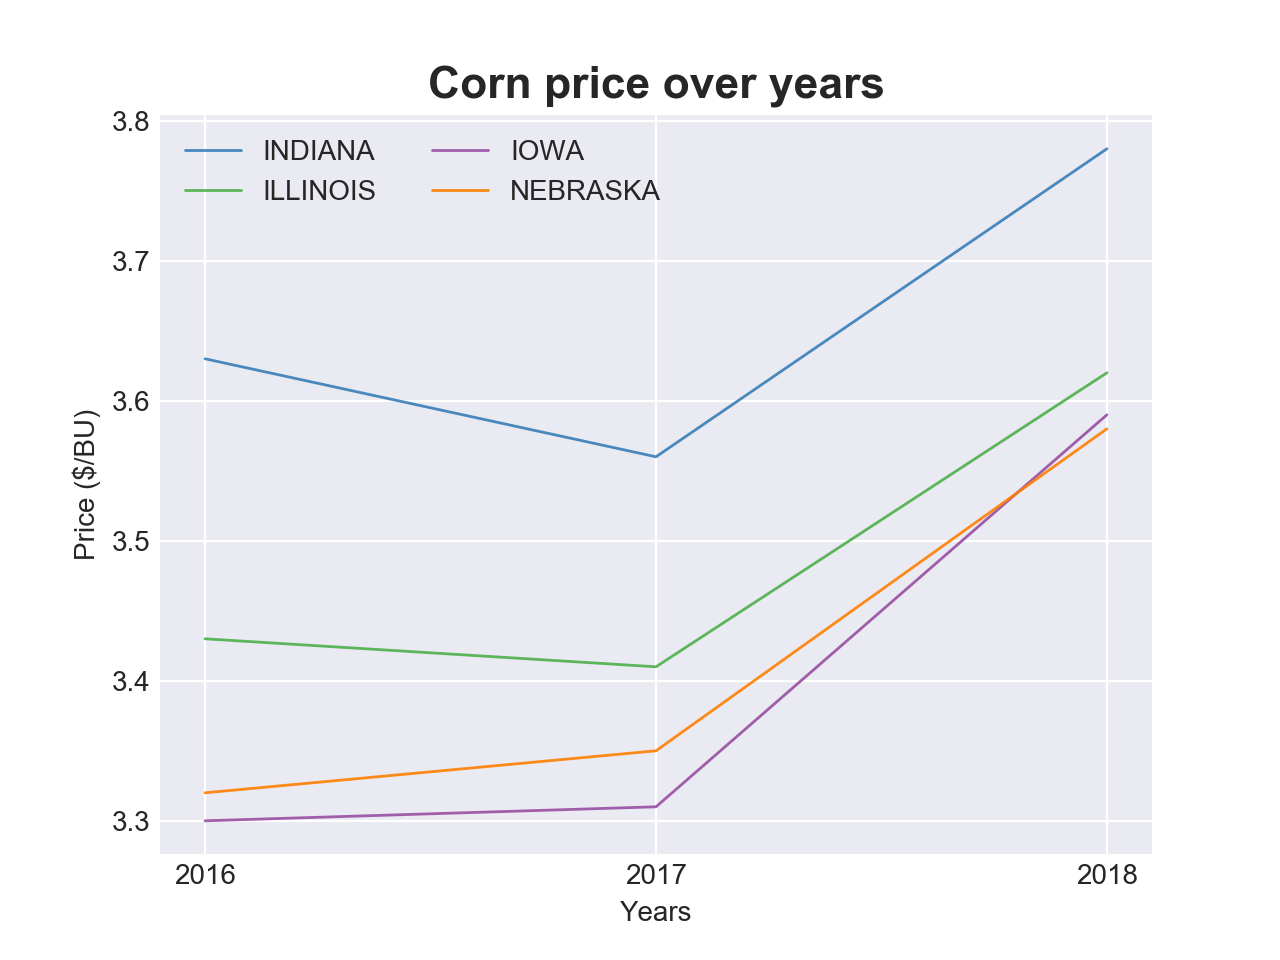

([<matplotlib.axis.XTick at 0x11be1bda0>,
 <a list of 3 Text xticklabel objects>)

In [32]:
# style
plt.style.use('seaborn-darkgrid')
#plt.style.use('fivethirtyeight')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in corn_price_selected_states.drop('Date', axis=1):
    num+=1
    plt.plot(corn_price_selected_states['Date'], corn_price_selected_states[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Corn price over years", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Years")
plt.ylabel("Price ($/BU)")
plt.xticks(corn_price_selected_states['Date'])


In [12]:
merged_df = "../Project-1---Corn-v.-Weather/dataset_weather_price_merged.csv"
original_merged_df = pd.read_csv(merged_df)
original_merged_df

,STATE,DATE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN,PRICE RECEIVED -- $ / BU,EAR COUNT - PER ACRE,"PRODUCTION, MEASURED IN $","PRODUCTION, MEASURED IN BU"
0,ILLINOIS,2016,201.290244,38.936098,17.380488,53.543902,63.104878,43.980488,3.43,"30,450","7,736,880,000","2,255,650,000"
1,ILLINOIS,2017,199.600000,37.517667,9.750000,53.351667,63.758333,42.945000,3.41,"30,250","7,505,240,000","2,200,950,000"
2,ILLINOIS,2018,201.947458,45.618305,26.445763,51.120339,60.940678,41.300000,3.62,"31,500","8,202,600,000","2,268,000,000"
3,INDIANA,2016,226.884000,43.821600,22.730000,53.620000,63.512000,43.740000,3.63,"29,250","3,435,105,000","946,310,000"
4,INDIANA,2017,232.743636,46.641091,13.647273,53.160000,63.154545,43.165455,3.56,"28,850","3,332,160,000","936,000,000"
5,INDIANA,2018,227.734545,49.072364,22.725455,51.861818,61.420000,42.312727,3.78,"29,750","3,538,080,000","967,680,000"
6,IOWA,2016,312.457692,39.022051,25.351282,50.560256,60.676923,40.434615,3.30,"30,500","9,043,650,000","2,740,500,000"
7,IOWA,2017,317.584000,33.835733,19.461333,49.581333,60.116000,39.060000,3.31,"30,600","8,625,198,000","2,605,800,000"
8,IOWA,2018,318.662500,47.120625,40.733750,47.097500,56.966250,37.228750,3.59,"30,800","8,780,800,000","2,499,000,000"
9,NEBRASKA,2016,749.909036,25.818193,27.725301,51.717470,64.606024,38.820482,3.32,"25,400","5,643,668,000","1,699,900,000"


In [13]:
merged_selected_col = original_merged_df[['STATE','DATE','TAVG','PRICE RECEIVED -- $ / BU']]
merged_selected_col

,STATE,DATE,TAVG,PRICE RECEIVED -- $ / BU
0,ILLINOIS,2016,53.543902,3.43
1,ILLINOIS,2017,53.351667,3.41
2,ILLINOIS,2018,51.120339,3.62
3,INDIANA,2016,53.620000,3.63
4,INDIANA,2017,53.160000,3.56
5,INDIANA,2018,51.861818,3.78
6,IOWA,2016,50.560256,3.30
7,IOWA,2017,49.581333,3.31
8,IOWA,2018,47.097500,3.59
9,NEBRASKA,2016,51.717470,3.32


Text(0, 0.5, 'Avg Price ($/BU)')

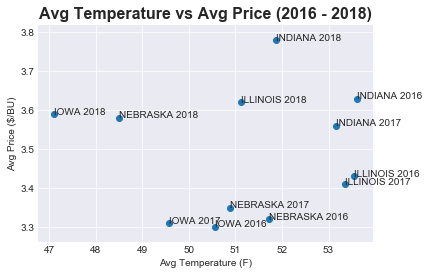

In [20]:

x = merged_selected_col['TAVG']
y = merged_selected_col['PRICE RECEIVED -- $ / BU']
n = merged_selected_col['STATE'].map(str) + ' '+ merged_selected_col['DATE'].map(str)
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
#plt.xticks(merged_selected_col['TAVG'])
plt.title("Avg Temperature vs Avg Price (2016 - 2018)", fontsize=16, fontweight='bold')
plt.xlabel("Avg Temperature (F)")
plt.ylabel("Avg Price ($/BU)")


In [15]:
original_merged_df['PROD IN BU (B)'] = (original_merged_df['PRODUCTION, MEASURED IN BU'].apply(lambda x: float(x.split()[0].replace(',', '')))/(1000000000)).round(2)

In [16]:
original_merged_df

,STATE,DATE,ELEVATION,PRCP,SNOW,TAVG,TMAX,TMIN,PRICE RECEIVED -- $ / BU,EAR COUNT - PER ACRE,"PRODUCTION, MEASURED IN $","PRODUCTION, MEASURED IN BU",PROD IN BU (B)
0,ILLINOIS,2016,201.290244,38.936098,17.380488,53.543902,63.104878,43.980488,3.43,"30,450","7,736,880,000","2,255,650,000",2.26
1,ILLINOIS,2017,199.600000,37.517667,9.750000,53.351667,63.758333,42.945000,3.41,"30,250","7,505,240,000","2,200,950,000",2.20
2,ILLINOIS,2018,201.947458,45.618305,26.445763,51.120339,60.940678,41.300000,3.62,"31,500","8,202,600,000","2,268,000,000",2.27
3,INDIANA,2016,226.884000,43.821600,22.730000,53.620000,63.512000,43.740000,3.63,"29,250","3,435,105,000","946,310,000",0.95
4,INDIANA,2017,232.743636,46.641091,13.647273,53.160000,63.154545,43.165455,3.56,"28,850","3,332,160,000","936,000,000",0.94
5,INDIANA,2018,227.734545,49.072364,22.725455,51.861818,61.420000,42.312727,3.78,"29,750","3,538,080,000","967,680,000",0.97
6,IOWA,2016,312.457692,39.022051,25.351282,50.560256,60.676923,40.434615,3.30,"30,500","9,043,650,000","2,740,500,000",2.74
7,IOWA,2017,317.584000,33.835733,19.461333,49.581333,60.116000,39.060000,3.31,"30,600","8,625,198,000","2,605,800,000",2.61
8,IOWA,2018,318.662500,47.120625,40.733750,47.097500,56.966250,37.228750,3.59,"30,800","8,780,800,000","2,499,000,000",2.50
9,NEBRASKA,2016,749.909036,25.818193,27.725301,51.717470,64.606024,38.820482,3.32,"25,400","5,643,668,000","1,699,900,000",1.70


In [17]:
# original_merged_df['PROD IN BU (B)'].plot(kind='bar', width = width)
# original_merged_df['TAVG'].plot(secondary_y=True)
# width = .35 # width of a bar
# plt.xlim([-width, len(original_merged_df['PROD IN BU (B)'])-width])
# ax.set_xticklabels(('2016', '2017', '2018'))

# plt.title("Production vs Temperature over time")
# plt.xlabel("Avg Temperature (F)")
# plt.ylabel("Avg Price ($/BU)")

# plt.show()

(-1, 12)

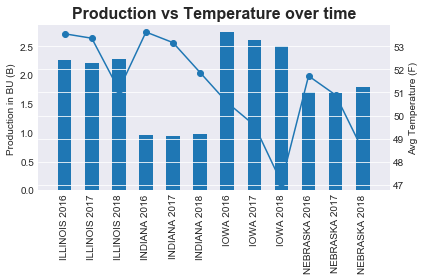

In [21]:
ax = original_merged_df['PROD IN BU (B)'].plot(kind='bar')
ax.set_ylabel("Production in BU (B) ", fontsize=10);
original_merged_df['TAVG'].plot(secondary_y=True,linestyle='-', marker='o', ax = ax)

plt.ylabel("Avg Temperature (F)")
#plt.ylabel("Avg Price ($/BU)")

ax.set_xticklabels(merged_selected_col['STATE'].map(str) + ' '+ merged_selected_col['DATE'].map(str), rotation=90) 
plt.title("Production vs Temperature over time", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.xlim(-1, 12)
